# Combining Data Sets

## Why Combine Data?

Sometimes, information is spread across multiple data sets.

For example, suppose we want to know which manufacturer's planes made the most flights in November 2013.

One data set contains information about flights in Nov.2013...

In [ ]:
# ! cd data && wget "https://datasci112.stanford.edu/data/nycflights13/flights11.csv"

import pandas as pd

data_dir = "data"
df_flights = pd.read_csv(f"{data_dir}/flights11.csv")
df_flights

--2025-08-24 14:42:11--  https://datasci112.stanford.edu/data/nycflights13/flights11.csv
Resolving datasci112.stanford.edu (datasci112.stanford.edu)... 54.81.116.232
Connecting to datasci112.stanford.edu (datasci112.stanford.edu)|54.81.116.232|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://web.stanford.edu/class/datasci112//data/nycflights13/flights11.csv [following]
--2025-08-24 14:42:12--  https://web.stanford.edu/class/datasci112//data/nycflights13/flights11.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1910080 (1.8M) [text/csv]
Saving to: ‘flights11.csv’

flights11.csv       100%[===================>]   1.82M   414KB/s    in 5.4s    

2025-08-24 14:42:16 (342 KB/s) - ‘flights11.csv’ saved [1910080/1910080]



,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,tailnum
0,2013,11,1,2108.0,2056,12.0,2335.0,2316,19.0,EV,4397,EWR,MSY,179.0,1167,20,56,N10156
1,2013,11,1,1154.0,1200,-6.0,1403.0,1359,4.0,US,2069,JFK,CLT,102.0,541,12,0,N102UW
2,2013,11,1,854.0,829,25.0,1128.0,1017,71.0,EV,4537,EWR,MEM,162.0,946,8,29,N10575
3,2013,11,1,1643.0,1505,98.0,1842.0,1703,99.0,EV,4572,EWR,GSP,104.0,594,15,5,N10575
4,2013,11,1,603.0,600,3.0,717.0,711,6.0,EV,4533,EWR,BUF,53.0,282,6,0,N11109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23295,2013,11,30,1337.0,1340,-3.0,1629.0,1652,-23.0,DL,1779,LGA,FLL,153.0,1076,13,40,N994DL
23296,2013,11,30,802.0,807,-5.0,1048.0,1112,-24.0,DL,1271,JFK,FLL,140.0,1069,8,7,N995DL
23297,2013,11,30,1544.0,1550,-6.0,1847.0,1910,-23.0,DL,2280,JFK,FLL,150.0,1069,15,50,N995DL
23298,2013,11,30,850.0,900,-10.0,1123.0,1144,-21.0,DL,1747,LGA,ATL,117.0,762,9,0,N996DL


...while another contains information about planes.

In [ ]:
# ! cd data && wget "https://datasci112.stanford.edu/data/nycflights13/planes.csv"

df_planes = pd.read_csv(f"{data_dir}/planes.csv")
df_planes

--2025-08-24 14:44:51--  https://datasci112.stanford.edu/data/nycflights13/planes.csv
Resolving datasci112.stanford.edu (datasci112.stanford.edu)... 54.81.116.232
Connecting to datasci112.stanford.edu (datasci112.stanford.edu)|54.81.116.232|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://web.stanford.edu/class/datasci112//data/nycflights13/planes.csv [following]
--2025-08-24 14:44:53--  https://web.stanford.edu/class/datasci112//data/nycflights13/planes.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280436 (274K) [text/csv]
Saving to: ‘planes.csv’

planes.csv          100%[===================>] 273.86K   260KB/s    in 1.1s    

2025-08-24 14:44:55 (260 KB/s) - ‘planes.csv’ saved [280436/280436]



,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In order to answer the question of which manufacturer made the most flights, we have to join these two data sets together.

## Keys

Planes are uniquely identified by ther *tail number* `(tailnum)`.

- `tailnum` is the primary key of `df_planes`. It uniquely identifies a plane.
- `tailnum` is a foreign key of `df_flights`. It points to the primary key of another table.

A **primary key** is a column (or a set of columns) that uniquely identifies observations in a data frame.

A **foreign key** is a column (or a set of columns) that points to the primary key of another data frame.

## Joining on a Key

The Pandas function `.merge()` can be used to join two `DataFrame`s on a key.

In [3]:
df_joined = df_flights.merge(df_planes, on="tailnum")
df_joined

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,tailnum,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,11,1,2108.0,2056,12.0,2335.0,2316,19.0,EV,...,56,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,2013,11,1,1154.0,1200,-6.0,1403.0,1359,4.0,US,...,0,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,2013,11,1,854.0,829,25.0,1128.0,1017,71.0,EV,...,29,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
3,2013,11,1,1643.0,1505,98.0,1842.0,1703,99.0,EV,...,5,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
4,2013,11,1,603.0,600,3.0,717.0,711,6.0,EV,...,0,N11109,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23295,2013,11,30,1337.0,1340,-3.0,1629.0,1652,-23.0,DL,...,40,N994DL,1991.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet
23296,2013,11,30,802.0,807,-5.0,1048.0,1112,-24.0,DL,...,7,N995DL,1991.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
23297,2013,11,30,1544.0,1550,-6.0,1847.0,1910,-23.0,DL,...,50,N995DL,1991.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
23298,2013,11,30,850.0,900,-10.0,1123.0,1144,-21.0,DL,...,0,N996DL,1991.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan


- Joining two data frames results in a *wider* data frame, with more columns.
- What's the deal with `year_x`?

## Overlapping Column Names

Both data frames contain a column named `year`, but we did not join on this as a key. <br />
By default, Pandas adds the suffixes `_x` and `_y` to overlapping column names, but this can be customized.

In [4]:
df_joined = df_flights.merge(df_planes, on="tailnum", suffixes=("_flight", "_plane"))
df_joined.columns

Index(['year_flight', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'tailnum', 'year_plane', 'type', 'manufacturer', 'model', 'engines',
       'seats', 'speed', 'engine'],
      dtype='object')

## Analyzing the Joined Data

Now that we have joined the two data sets, we can answer the question: which manufacturer's planes made the most flights?

In [5]:
df_joined["manufacturer"].value_counts()

manufacturer
BOEING                           6557
EMBRAER                          5175
AIRBUS                           3954
AIRBUS INDUSTRIE                 3456
BOMBARDIER INC                   2632
MCDONNELL DOUGLAS AIRCRAFT CO     811
MCDONNELL DOUGLAS                 330
CANADAIR                          122
MCDONNELL DOUGLAS CORPORATION     121
CESSNA                             36
CIRRUS DESIGN CORP                 21
ROBINSON HELICOPTER CO             19
BARKER JACK L                      15
PIPER                               9
FRIEDEMANN JON                      8
SIKORSKY                            6
BELL                                5
DEHAVILLAND                         4
AMERICAN AIRCRAFT INC               3
AGUSTA SPA                          3
LEARJET INC                         2
LAMBERT RICHARD                     2
DOUGLAS                             2
KILDALL GARY                        2
AVIAT AIRCRAFT INC                  1
MARZ BARRY                          1

## Joining to Weather Data

What weather factors cause flight delays?

To answer this question, we need to join the flights data to weather data. Here is a data set containing hourly weather data at each airport in 2013.

In [8]:
# ! cd data && wget "https://datasci112.stanford.edu/data/nycflights13/weather.csv"

df_weather = pd.read_csv(f"{data_dir}/weather.csv")
df_weather

,airport,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0


What is the primary key of this data set?
(airport, year, month, day, hour)

## A Key with Multiple Columns

Let's start by looking at flights out of JFK. We need to join to the weather data on year, month, day, and hour.

In [9]:
df_jfk = df_flights[df_flights["origin"] == "JFK"].merge(
    df_weather[df_weather["airport"] == "JFK"],
    on=("year", "month", "day", "hour")
)
df_jfk

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,airport,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,11,1,1154.0,1200,-6.0,1403.0,1359,4.0,US,...,JFK,64.04,55.94,74.94,230.0,18.41248,NaN,0.00,1002.8,10.0
1,2013,11,1,2055.0,2100,-5.0,2349.0,20,-31.0,DL,...,JFK,60.98,57.02,86.79,240.0,8.05546,NaN,0.00,1005.0,10.0
2,2013,11,1,1814.0,1815,-1.0,2236.0,2138,58.0,DL,...,JFK,62.06,53.96,74.75,200.0,13.80936,NaN,0.00,1003.9,10.0
3,2013,11,1,1014.0,1015,-1.0,1214.0,1218,-4.0,US,...,JFK,64.40,60.80,88.09,250.0,21.86482,NaN,0.07,NaN,10.0
4,2013,11,1,1852.0,1855,-3.0,2118.0,2130,-12.0,DL,...,JFK,62.06,53.96,74.75,200.0,13.80936,NaN,0.00,1003.9,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,2013,11,30,2009.0,1935,34.0,2110.0,2117,-7.0,9E,...,JFK,37.04,26.06,64.46,60.0,8.05546,NaN,0.00,NaN,10.0
7397,2013,11,30,2047.0,2050,-3.0,2205.0,2212,-7.0,DL,...,JFK,37.04,26.06,64.17,50.0,6.90468,NaN,0.00,1031.9,10.0
7398,2013,11,30,1841.0,1845,-4.0,2122.0,2152,-30.0,DL,...,JFK,35.96,24.98,64.03,60.0,8.05546,NaN,0.00,1033.6,10.0
7399,2013,11,30,802.0,807,-5.0,1048.0,1112,-24.0,DL,...,JFK,30.02,17.06,58.08,60.0,10.35702,NaN,0.00,1042.1,10.0


Let's see how visibility affects departure delays.

<Axes: xlabel='visib', ylabel='dep_delay'>

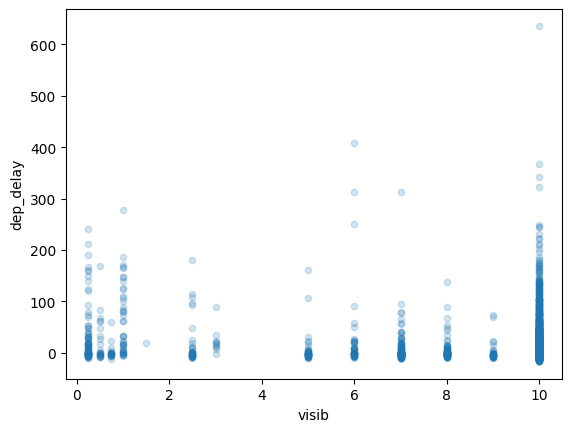

In [10]:
df_jfk.plot.scatter(x="visib", y="dep_delay", alpha=0.2)

<Axes: xlabel='visib'>

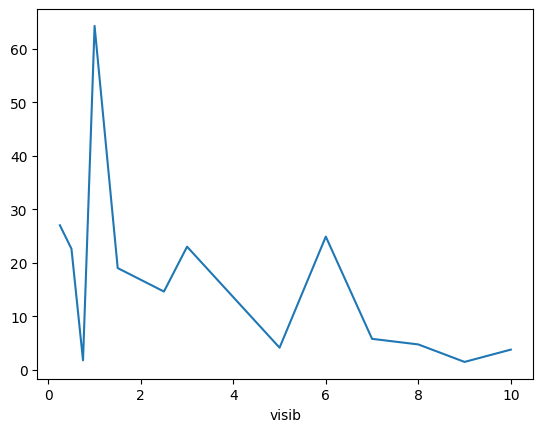

In [11]:
df_jfk.groupby("visib")["dep_delay"].mean().plot.line()

## Joining on Keys with Different Names

Sometimes, the join keys have different names in the two data sets. This happens if the data sets come from different sources.

For example, if we want to join the (entire) flights data to the weather data, we would need to include the airport in the key. <br />
But the airport is called `"origin"` in `df_flights` and `"airport"` in `df_weather`.

The `.merge()` function provides `left_on=` and `right_on=` arguments for specifying different column names in the **left** and **right** data frames.

In [14]:
df_flights_weather = df_flights.merge(
    df_weather,
    left_on=("origin", "year", "month", "day", "hour"),
    right_on=("airport", "year", "month", "day", "hour")
)
df_flights_weather

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,airport,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,11,1,2108.0,2056,12.0,2335.0,2316,19.0,EV,...,EWR,62.96,55.04,75.33,230.0,12.65858,17.26170,0.00,1003.9,10.0
1,2013,11,1,1154.0,1200,-6.0,1403.0,1359,4.0,US,...,JFK,64.04,55.94,74.94,230.0,18.41248,NaN,0.00,1002.8,10.0
2,2013,11,1,854.0,829,25.0,1128.0,1017,71.0,EV,...,EWR,69.08,62.06,78.33,200.0,20.71404,32.22184,0.01,1001.3,10.0
3,2013,11,1,1643.0,1505,98.0,1842.0,1703,99.0,EV,...,EWR,69.98,51.98,52.80,240.0,18.41248,26.46794,0.00,1001.4,10.0
4,2013,11,1,603.0,600,3.0,717.0,711,6.0,EV,...,EWR,69.98,62.96,78.41,200.0,18.41248,25.31716,0.00,1002.2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,2013,11,30,1337.0,1340,-3.0,1629.0,1652,-23.0,DL,...,LGA,35.96,12.02,36.71,0.0,0.00000,NaN,0.00,1036.9,10.0
23211,2013,11,30,802.0,807,-5.0,1048.0,1112,-24.0,DL,...,JFK,30.02,17.06,58.08,60.0,10.35702,NaN,0.00,1042.1,10.0
23212,2013,11,30,1544.0,1550,-6.0,1847.0,1910,-23.0,DL,...,JFK,35.96,24.08,61.67,80.0,9.20624,NaN,0.00,1036.1,10.0
23213,2013,11,30,850.0,900,-10.0,1123.0,1144,-21.0,DL,...,LGA,30.02,17.06,58.08,70.0,10.35702,NaN,0.00,1041.4,10.0


Notice that `df_flights_weather` contains columns called **`origin`** and **`airport`**.

Now that the data is joined, we can visualize the average departure delay as a function of the visibility at the three airports.

<Axes: xlabel='visib'>

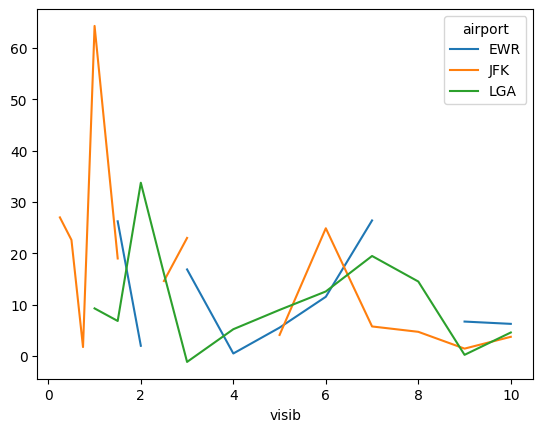

In [15]:
(df_flights_weather
 .groupby(["airport", "visib"])["dep_delay"].mean()
 .unstack("airport")
 .plot.line())